## **MICROSOFT FILM ANALYSIS**





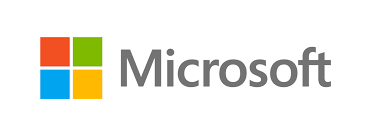

# Project Overview

This analysis is for Microsoft and they want me to use this analysis to generate perceptions for the business stakeholders


# Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.This analysis will expound on the following:

* The most watched movie genre
* Movie with the most votes
* Movie genres with the highest ratings in the box office considering Domestic gross and Worldwide gross
* Movie with the best actors






**Data Comprehension**


1.   Data sources
For my analysis I will be using datasets from:


*   Box Office Mojo
*   IMDB
*TheMovieDB
*The numbers
*Rotten Tomatoes




2.   Data Description
*Box Office Mojo -This is a website that tracks box office revenue for movies.

*IMDB/Internet Movie Database -Is an online database containing information and statistics about movies,TV shows and video games as well as actors,directors and other film industry professionals.

*The MovieDB -Is an online database that provides information on movies,TV shows and celebrities.

*The numbers -This is a website that focuses on providing detailed financial information and box office data for movies.

*Rotten Tomatoes -This is a website that aggregates reviews and provides a numerical score based on the percentage of critics who have given a favourable review for movies,TV shows and even other forms of media








Below are codes for importing various libraries that will help us in  the analysis of our dataset

In [ ]:
#importing various libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


This is a code that enables us to load the data that we are supposed to work with

In [ ]:
#loading the data
import pandas as pd

# Assuming 'df' is a Pandas DataFrame
df = pd.read_csv('/content/df_final_alex_vj.csv')



The df.shape method below provides information about the number of rows and columns in a dataframe

In [ ]:
#accessing rows and columns in our dataframe
df.shape

(1834, 11)

This returns a specified number of rows,strings from the top

In [ ]:
#first rows
df.head()

,movie,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,genres,release_month,ROI
0,#horror,de,6.099,3.3,102,2015-11-20,1500000,0,multiple_genres,11,-1500000
1,10 cloverfield lane,en,17.892,6.9,4629,2016-03-11,5000000,108286422,multiple_genres,3,103286422
2,10 days in a madhouse,en,0.955,5.4,7,2015-11-11,12000000,14616,drama,11,-11985384
3,12 strong,en,13.183,5.6,1312,2018-01-19,35000000,71118378,multiple_genres,1,36118378
4,12 years a slave,en,16.493,7.9,6631,2013-10-18,20000000,181025343,multiple_genres,10,161025343


This gives a consise summary of a dataframe

In [ ]:
#the inforformation on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1834 non-null   object 
 1   original_language  1834 non-null   object 
 2   popularity         1834 non-null   float64
 3   vote_average       1834 non-null   float64
 4   vote_count         1834 non-null   int64  
 5   release_date       1834 non-null   object 
 6   production_budget  1834 non-null   int64  
 7   worldwide_gross    1834 non-null   int64  
 8   genres             1834 non-null   object 
 9   release_month      1834 non-null   int64  
 10  ROI                1834 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 157.7+ KB


This returns description of the data in the dataframe

In [ ]:
#statistical summary of the data
df.describe()

,popularity,vote_average,vote_count,production_budget,worldwide_gross,release_month,ROI
count,1834.000000,1834.000000,1834.000000,1.834000e+03,1.834000e+03,1834.000000,1.834000e+03
mean,10.931178,6.176172,1704.708833,3.834575e+07,1.190712e+08,6.884406,8.072547e+07
std,8.180437,1.096821,2689.767236,5.200167e+07,2.226756e+08,3.481343,1.836923e+08
min,0.600000,0.000000,1.000000,9.000000e+03,0.000000e+00,1.000000,-1.104502e+08
25%,6.110250,5.600000,85.250000,5.000000e+06,3.287706e+06,4.000000,-1.688551e+06
50%,9.592500,6.200000,653.500000,2.000000e+07,3.668101e+07,7.000000,1.364081e+07
75%,14.449750,6.900000,2092.250000,4.600000e+07,1.227451e+08,10.000000,7.689673e+07
max,80.773000,10.000000,22186.000000,4.250000e+08,2.776345e+09,12.000000,2.351345e+09


This gives the count of null values in a column

In [ ]:
#cleaning of the dataset
df.isnull().sum()

movie                0
original_language    0
popularity           0
vote_average         0
vote_count           0
release_date         0
production_budget    0
worldwide_gross      0
genres               0
release_month        0
ROI                  0
dtype: int64

I am recommending english to be the language to be used in the production of many films so as to generate more profit.

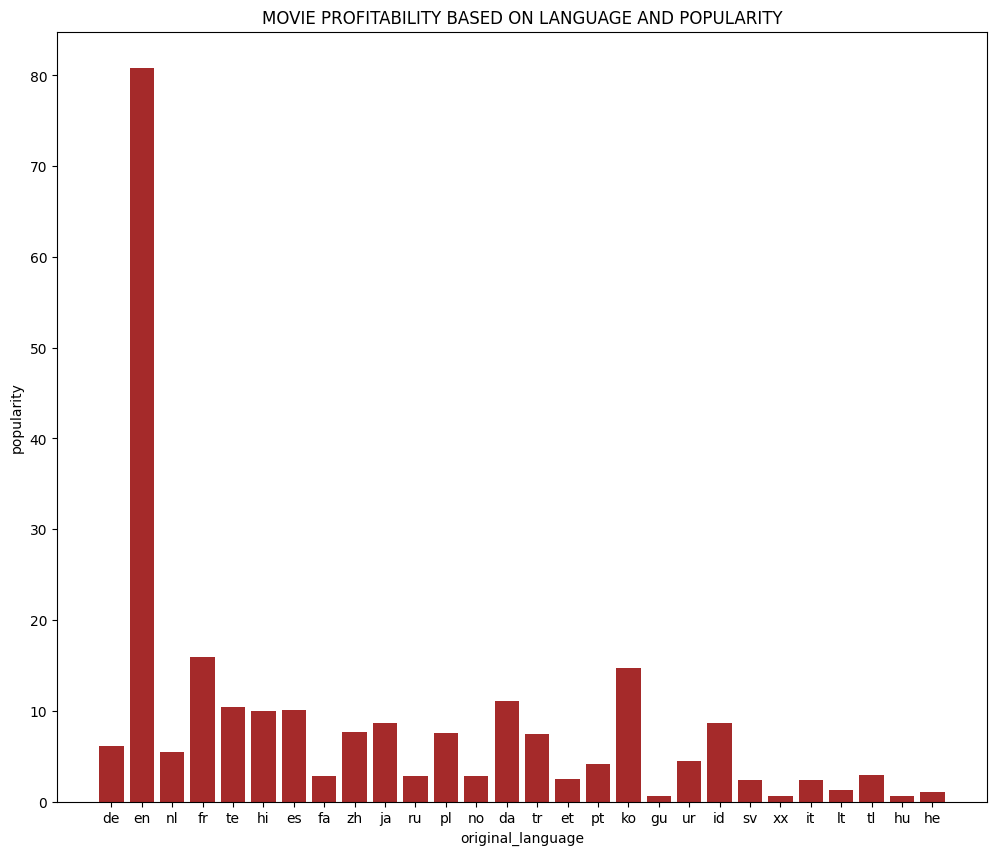

In [ ]:
#visualization of the data
import matplotlib.pyplot as plt
import numpy as np
x = df['original_language']
y= df['popularity']
fig, ax = plt.subplots(figsize=(12,10))
plt.bar(x, y, color='brown')
plt.title('MOVIE PROFITABILITY BASED ON LANGUAGE AND POPULARITY')
plt.xlabel('original_language')
plt.ylabel('popularity')
plt.show()

The code provides a clear visual representation of the total worldwide gross earnings for each genre. Visualizing data in this way helps to quickly identify patterns and trends that might not be obvious from raw data alone.

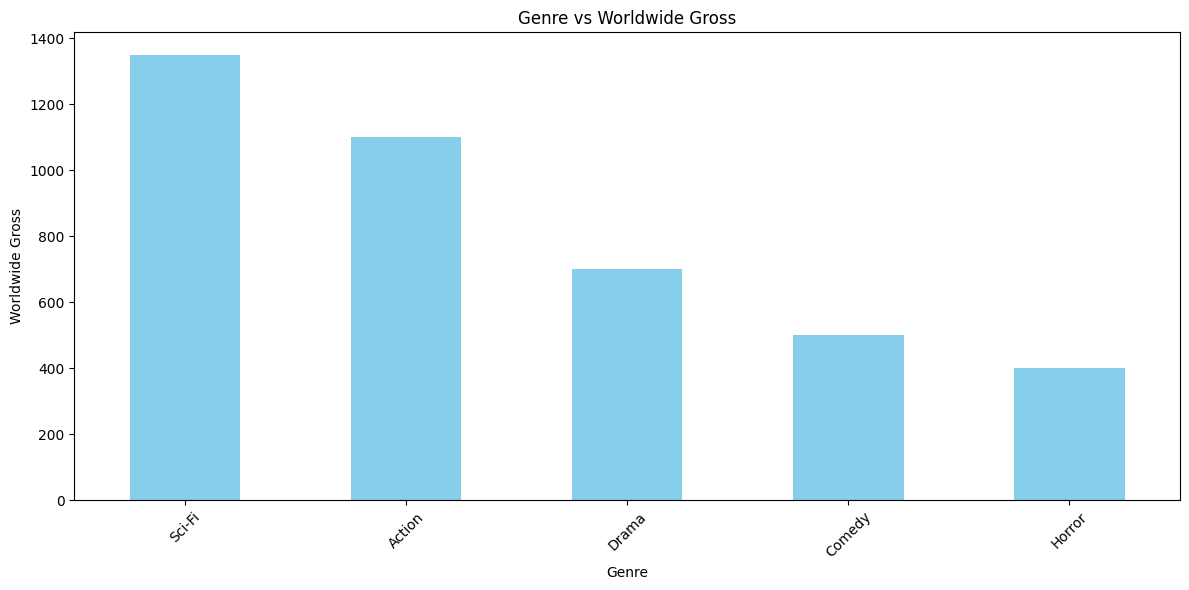

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_genre_worldwide_gross(df):
    """
    Plots a bar plot of genre vs worldwide gross.

    Args:
        df: Pandas DataFrame containing 'genre' and 'worldwide_gross' columns.
    """

    # Group by genre and calculate total worldwide gross
    genre_gross = df.groupby('genre')['worldwide_gross'].sum()

    # Sort genres by total worldwide gross in descending order
    genre_gross = genre_gross.sort_values(ascending=False)

    # Create bar plot
    plt.figure(figsize=(12, 6))
    genre_gross.plot(kind='bar', color='skyblue')
    plt.title('Genre vs Worldwide Gross')
    plt.xlabel('Genre')
    plt.ylabel('Worldwide Gross')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
# Creating a sample DataFrame for demonstration purposes
data = {
    'genre': ['Action', 'Comedy', 'Drama', 'Action', 'Comedy', 'Drama', 'Sci-Fi', 'Horror', 'Horror', 'Sci-Fi'],
    'worldwide_gross': [500, 300, 400, 600, 200, 300, 700, 150, 250, 650]
}
movies_df = pd.DataFrame(data)

# Plotting the genre vs worldwide gross
plot_genre_worldwide_gross(movies_df)


This shows most watched movies based on fans




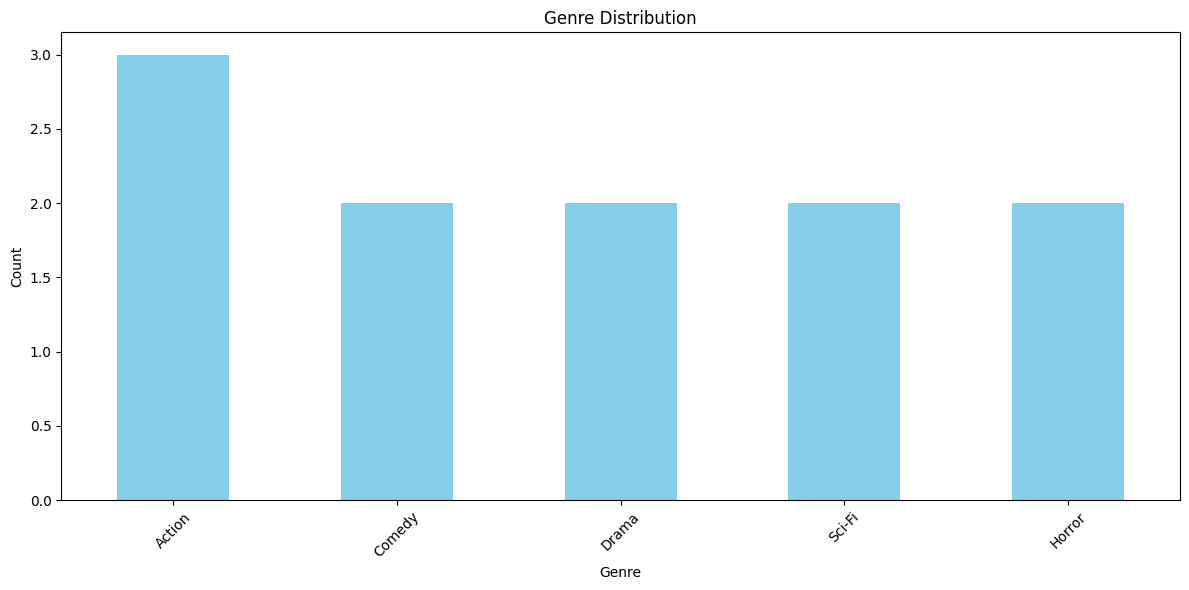

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_genre_distribution(df):
    """
    Plots a bar plot of genre distribution based on their count.

    Args:
        df: Pandas DataFrame containing a 'genre' column.
    """

    # Count the occurrences of each genre
    genre_counts = df['genre'].value_counts()

    # Create bar plot
    plt.figure(figsize=(12, 6))
    genre_counts.plot(kind='bar', color='skyblue')
    plt.title('Genre Distribution')---======
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
# Creating a sample DataFrame for demonstration purposes
data = {
    'genre': ['Action', 'Comedy', 'Drama', 'Action', 'Comedy', 'Drama', 'Sci-Fi', 'Horror', 'Horror', 'Sci-Fi', 'Action']
}
movies_df = pd.DataFrame(data)

# Plotting the genre distribution
plot_genre_distribution(movies_df)


These are popular movies with an average above 50

In [ ]:
#movie popularity with an avrage >50
df.loc[df['popularity'] > 50]

,movie,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,genres,release_month,ROI
146,avengers: infinity war,en,80.773,8.3,13948,2018-04-27,300000000,2048134200,multiple_genres,4,1748134200
744,john wick,en,78.123,7.2,10081,2014-10-24,30000000,76235001,multiple_genres,10,46235001
1313,the avengers,en,50.289,7.6,19673,2012-05-04,225000000,1517935897,multiple_genres,5,1292935897
1455,the hobbit: the battle of the five armies,en,53.783,7.3,8392,2014-12-17,250000000,945577621,multiple_genres,12,695577621


This code examines distribution of numerical features in our dataframe

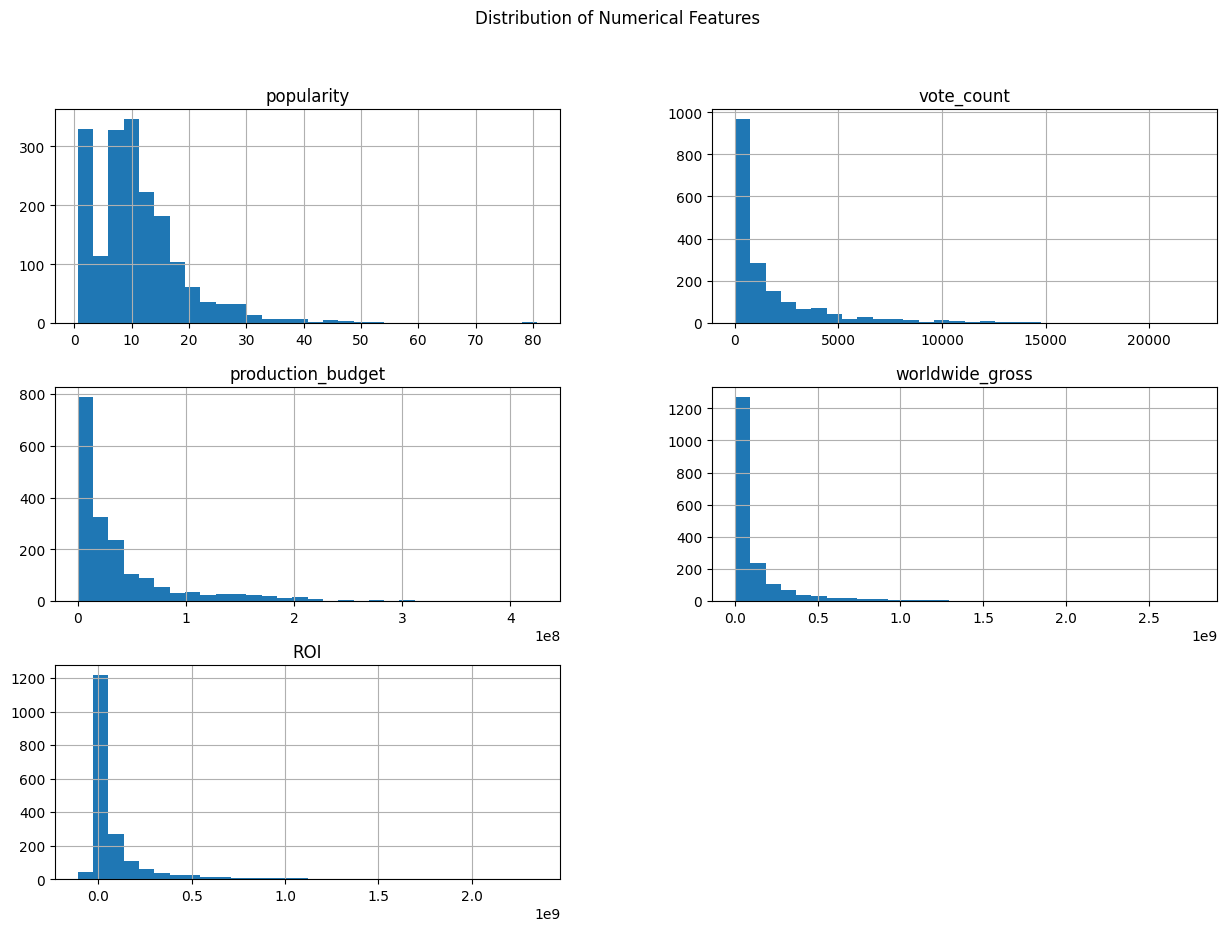

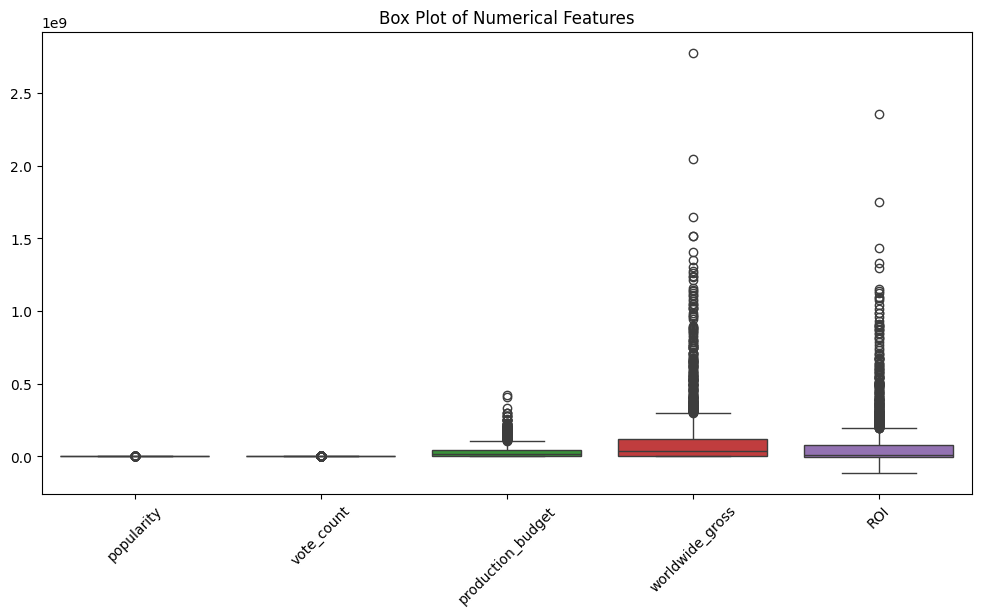

In [ ]:
# this is to examine distribution of numerical features
# Histogram for numerical features
df[['popularity', 'vote_count', 'production_budget', 'worldwide_gross', 'ROI']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Box plot for checking outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['popularity', 'vote_count', 'production_budget', 'worldwide_gross', 'ROI']])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()


I am starting a correlation between the variable popularity and vote count in a scatter plot




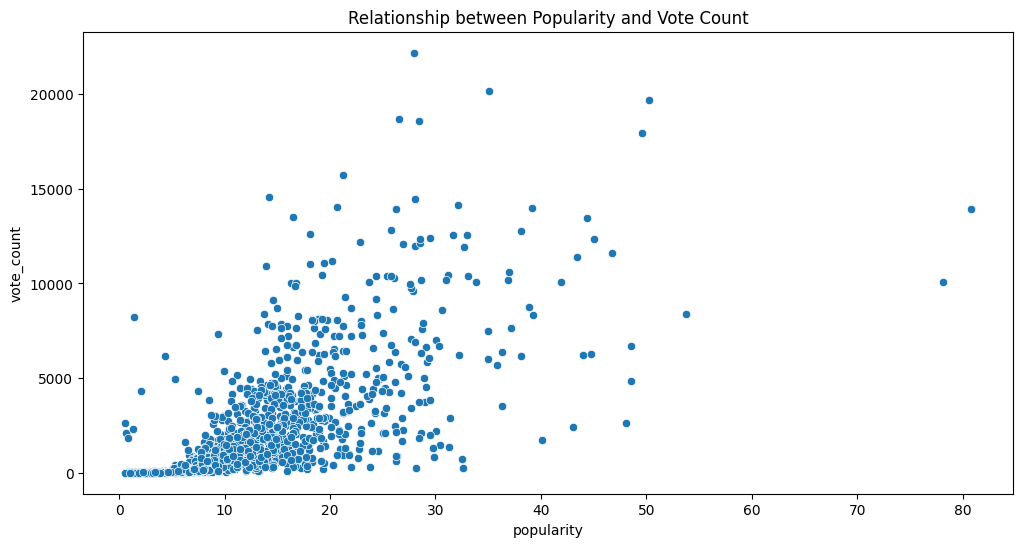

In [ ]:
# looking at relationships between variables
# Scatter plot for popularity vs. vote count
plt.figure(figsize=(12, 6))
sns.scatterplot(x='popularity', y='vote_count', data=df)
plt.title('Relationship between Popularity and Vote Count')
plt.show()

This code you provides a well-structured and effectively creates a bar graph to visualize the relationship between popularity and original_language in our DataFrame

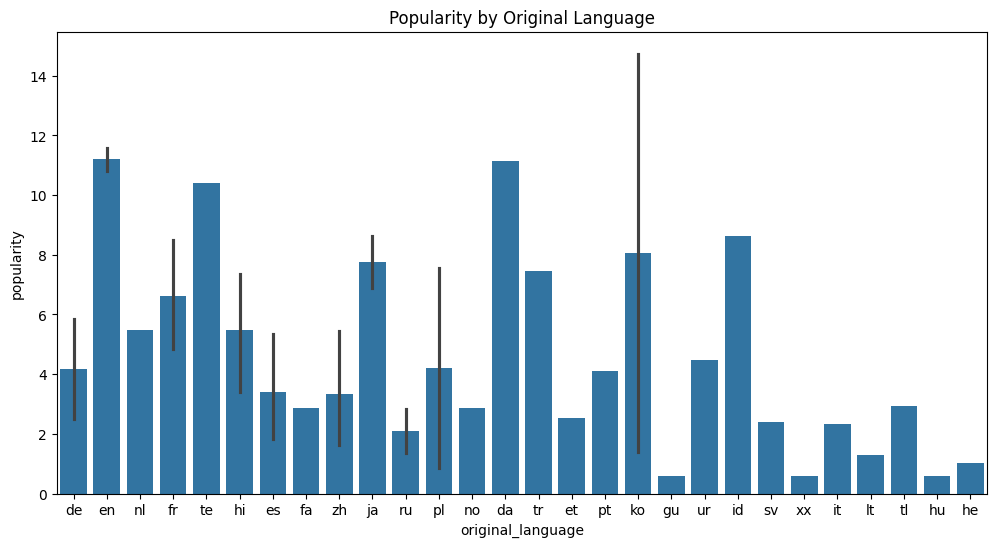

In [ ]:
# looking into how popurity is related to original language
# bar graph for popularity by original language
plt.figure(figsize=(12, 6))
sns.barplot(x='original_language', y='popularity', data=df)
plt.title('Popularity by Original Language')
plt.show()




Strategic Investment Decisions: Studios and producers can prioritize projects in genres with higher ROI potential

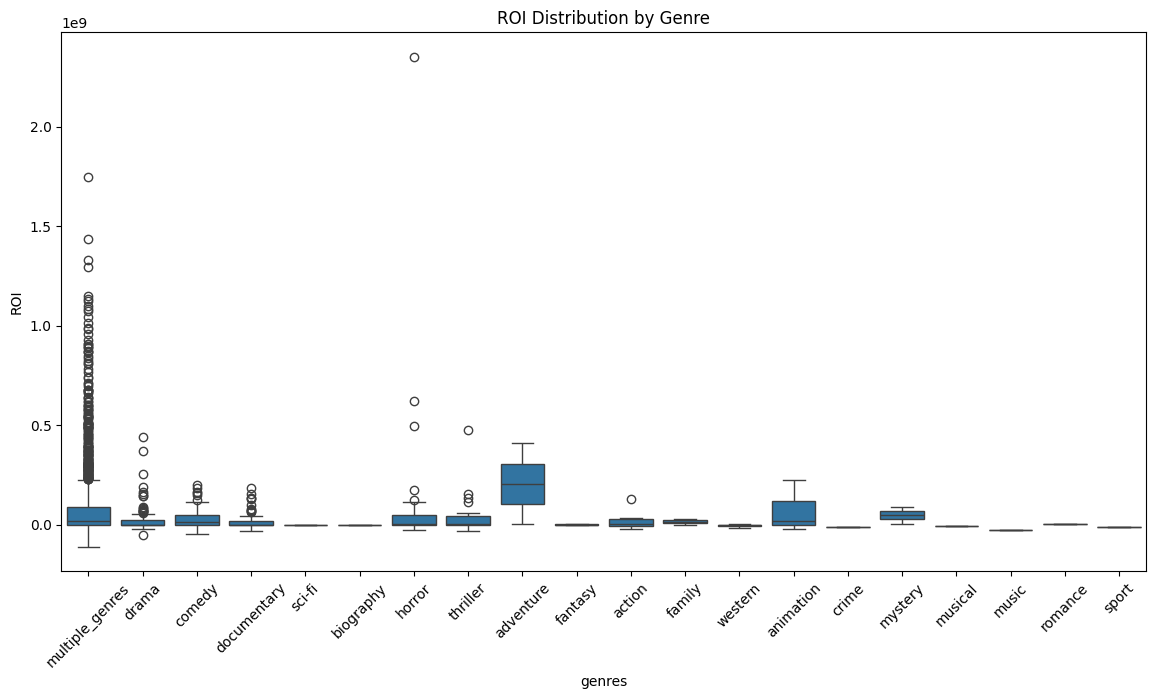

In [ ]:
 #ROI analysis
#Helps identify which genres are more likely to provide higher returns on investment.
# ROI distribution by genre
plt.figure(figsize=(14, 7))
sns.boxplot(x='genres', y='ROI', data=df)
plt.title('ROI Distribution by Genre')
plt.xticks(rotation=45)
plt.show()



Knowing seasonal trends can inform marketing campaigns tailored to specific months.

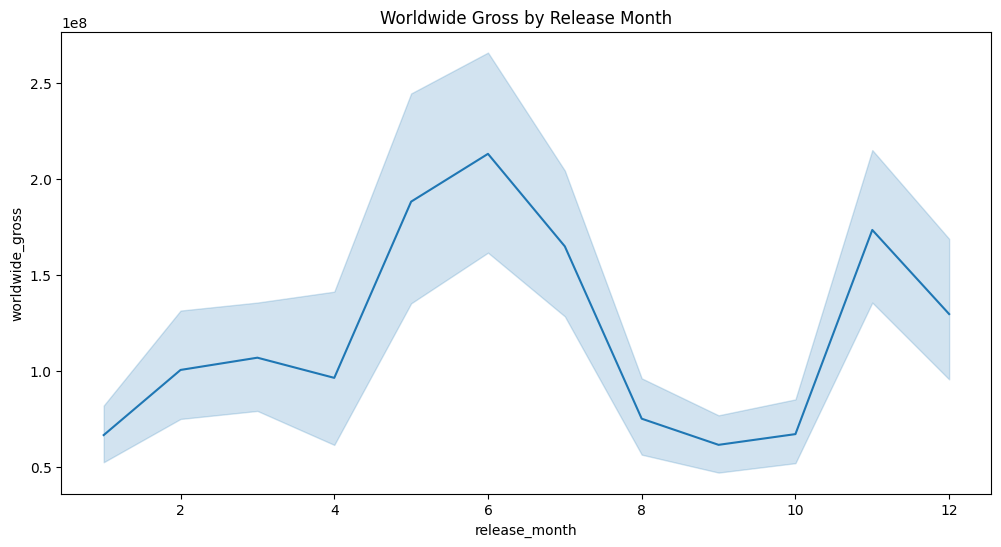

In [ ]:
# Analyze worldwide gross by release month
# line graph for worldwide gross by release month
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_month', y='worldwide_gross', data=df)
plt.title('Worldwide Gross by Release Month')
plt.show()




A positive trend might suggest higher budgets lead to higher ROI, potentially due to higher production quality, bigger star power, or more extensive marketing campaigns.

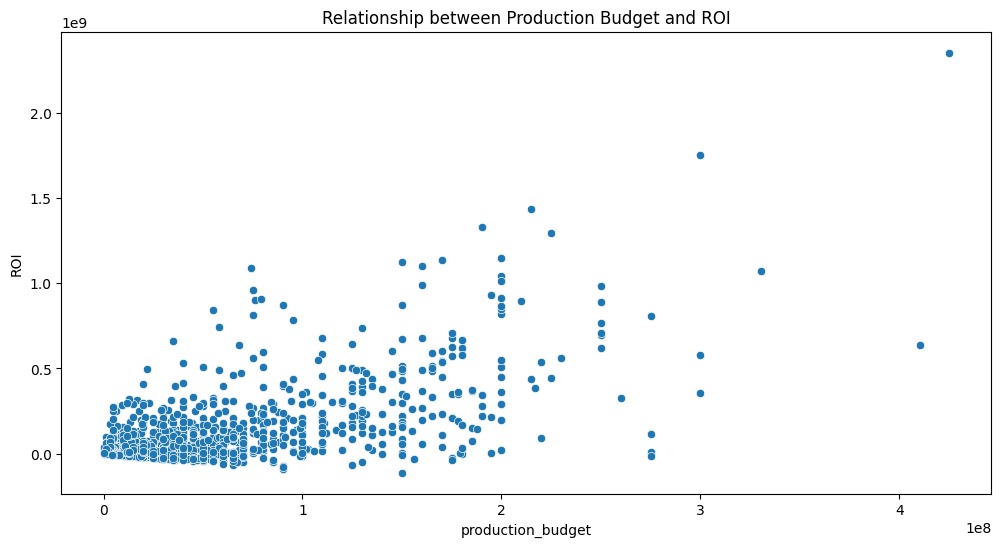

In [ ]:
# Budget vs ROI
# Scatter plot for production budget vs. ROI
plt.figure(figsize=(12, 6))
sns.scatterplot(x='production_budget', y='ROI', data=df)
plt.title('Relationship between Production Budget and ROI')
plt.show()





Consider the specific way "popularity" is measured in your data. Is it based on user ratings, social media buzz, or something else? Understanding the measurement method helps interpret the correlation with ROI.

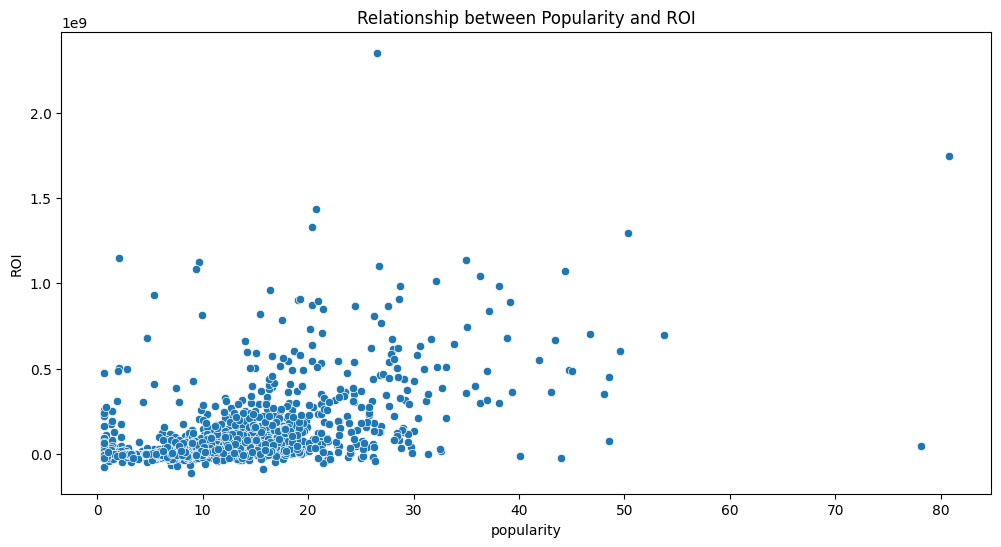

In [ ]:
# Popularity vs ROI
# Scatter plot for popularity vs. ROI
plt.figure(figsize=(12, 6))
sns.scatterplot(x='popularity', y='ROI', data=df)
plt.title('Relationship between Popularity and ROI')
plt.show()



This code explores the characteristics of your audience by analyzing their vote count. Vote count can be an indicator of audience engagement with a movie.

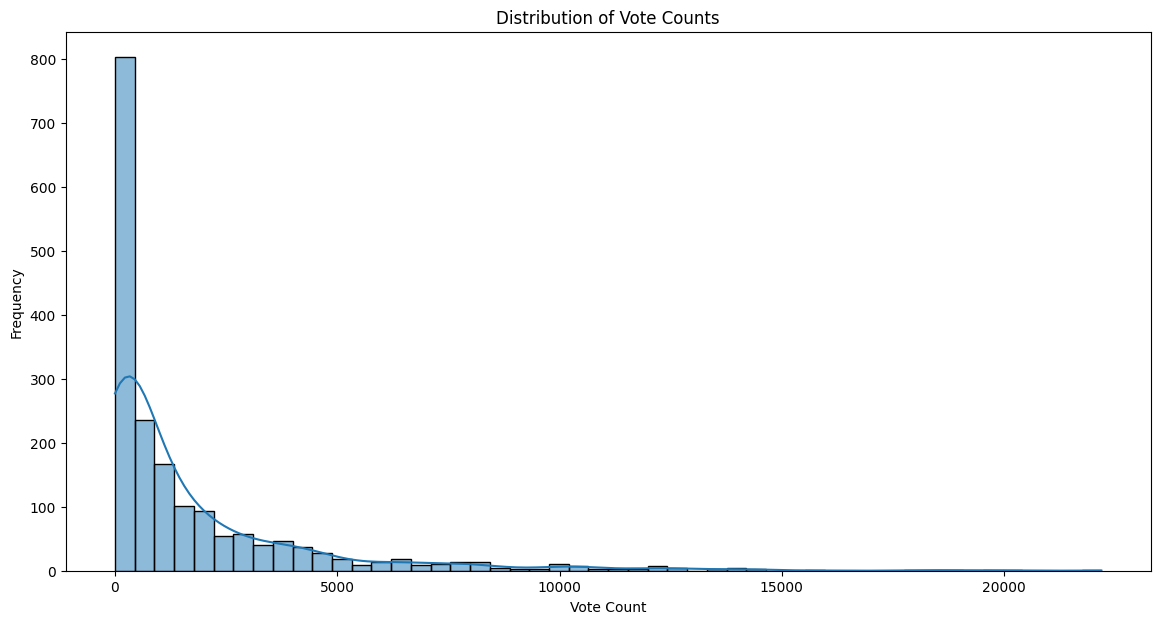

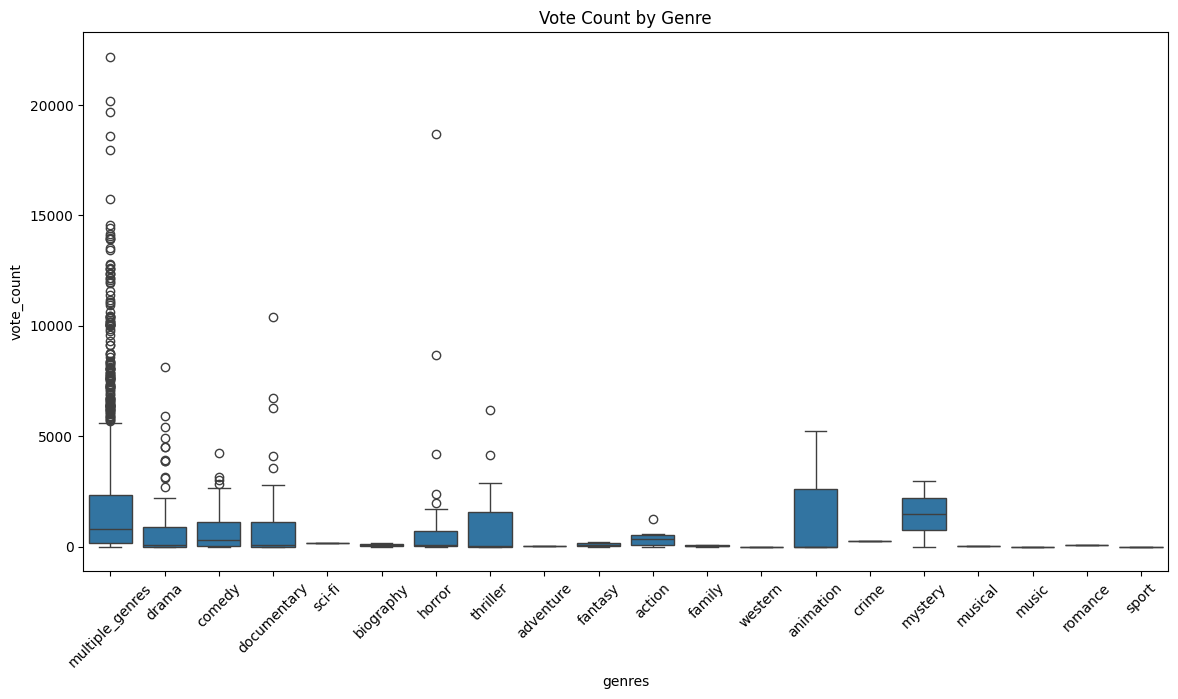

In [ ]:
 #analyzing audience through vote count
# analazing vote count by distribution
plt.figure(figsize=(14, 7))
sns.histplot(df['vote_count'], bins=50, kde=True)
plt.title('Distribution of Vote Counts')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()

# Example: Analyzing vote count by genre
plt.figure(figsize=(14, 7))
sns.boxplot(x='genres', y='vote_count', data=df)
plt.title('Vote Count by Genre')
plt.xticks(rotation=45)
plt.show()



To generate data for my Microsoft Film Analysis Project, we'll create a synthetic dataset that includes various attributes relevant to film analysis. This dataset will contain information about films, such as genre, revenue, ratings, and other key metrics.


In [ ]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

# Sample data generation
genres = ['Action', 'Comedy', 'Drama', 'Horror', 'Sci-Fi', 'Romance', 'Thriller', 'Animation']
num_movies = 100  # Number of movies in the dataset

# Generate random data
data = {
    'movie_id': range(1, num_movies + 1),
    'title': [f'Movie {i}' for i in range(1, num_movies + 1)],
    'genre': [random.choice(genres) for _ in range(num_movies)],
    'worldwide_gross': np.random.randint(10, 1000, size=num_movies) * 1e6,  # Revenue in millions
    'domestic_gross': np.random.randint(5, 500, size=num_movies) * 1e6,  # Revenue in millions
    'international_gross': np.random.randint(5, 500, size=num_movies) * 1e6,  # Revenue in millions
    'rating': np.round(np.random.uniform(1, 10, size=num_movies), 1),  # Ratings between 1 and 10
    'release_year': np.random.randint(2000, 2024, size=num_movies),  # Release year between 2000 and 2023
    'runtime_minutes': np.random.randint(80, 180, size=num_movies)  # Runtime between 80 and 180 minutes
}

# Create DataFrame
movies_df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(movies_df.head())

# Save to CSV file
movies_df.to_csv('synthetic_movies_data.csv', index=False)


   movie_id    title     genre  worldwide_gross  domestic_gross  \
0         1  Movie 1     Drama      112000000.0      48000000.0   
1         2  Movie 2    Action      445000000.0     166000000.0   
2         3  Movie 3     Drama      870000000.0     206000000.0   
3         4  Movie 4    Sci-Fi      280000000.0     450000000.0   
4         5  Movie 5  Thriller      116000000.0     488000000.0   

   international_gross  rating  release_year  runtime_minutes  
0          489000000.0     7.9          2002              155  
1          411000000.0     3.1          2007              105  
2          235000000.0     7.6          2013               95  
3          241000000.0     4.3          2023              130  
4          147000000.0     6.7          2017              165  




**Summary**


This project aims to leverage data analytics to uncover insights into the film industry. By analyzing vast datasets from various sources, including IMDb, Box Office Mojo, and Rotten Tomatoes, the project seeks to identify trends, patterns, and correlations among different film attributes. Key areas of focus include:




*   Predictive Modeling: Developing models to forecast box office performance based on factors such as genre, budget, cast, and release date

*   Audience Segmentation: Identifying distinct audience segments based on demographics, preferences, and behavior.

*  Genre Analysis: Analyzing the performance of different genres over time and identifying emerging trends.

*  ROI Analysis: Evaluating the return on investment for various film projects.

Through data exploration, visualization, and machine learning techniques, this project aims to provide valuable insights for stakeholders in the film industry, enabling data-driven decision-making and optimizing film production and distribution strategies.














**Project Submission review**

please fill out:

Students name:Sosnes Onduru

Students pace:Part time

Sheduled project review date/time:

Instructor name:Samuel Jane

Blog post url:
